In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import random

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Visualize the `NoisyDataset` Dataset

In [58]:
patch_xy = 256
frames_per_patch = 8
dataset = NoisyDataset(
    "oabf_astro",
    patch_xy=patch_xy,
    frames_per_patch=frames_per_patch,
    augument=False,
    max_frames=32,
    overlap=0.5,
    verbose=True,
)

The dataset has 3z x 3y x 3x = 27 samples


In [63]:
idx = random.randrange(0, len(dataset))
even, odd = dataset[idx]
assert even.size(1) == frames_per_patch
even.shape, odd.shape

(1, 2, 1) --> [8:24z, 256:512y, 128:384x]


(torch.Size([1, 8, 256, 256]), torch.Size([1, 8, 256, 256]))

(0, 0, 0) --> [0:16z, 0:256y, 0:256x]


(1, 0, 0) --> [0:16z, 0:256y, 128:384x]
(2, 0, 0) --> [0:16z, 0:256y, 256:512x]
(0, 1, 0) --> [0:16z, 128:384y, 0:256x]
Even frames:


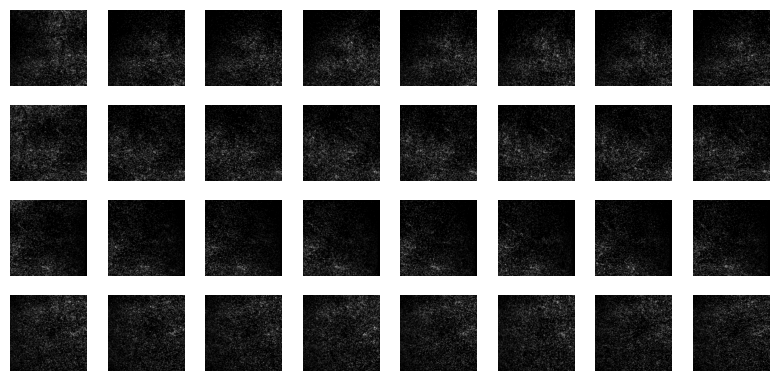

Odd frames:


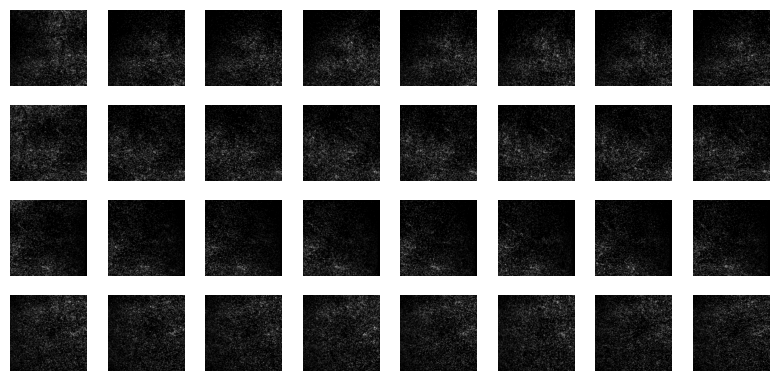

In [65]:
samples = [dataset[idx] for idx in range(4)]
cprint("green:Even frames:")
imshow([_.numpy() for s in samples for _ in s[0][0]], cmap="grey", size=1, cols=8)
cprint("red:Odd frames:")
imshow([_.numpy() for s in samples for _ in s[1][0]], cmap="grey", size=1, cols=8)